<a href="https://colab.research.google.com/github/Bruno-4lmeida/SBM/blob/main/ModelRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Instalar os pacotes necessários
! pip install pandas numpy matplotlib seaborn scikit-learn

# Importaçao dos Modulos

In [37]:
# Módulos para manipulação de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Módulos de scikit-learn para regressão
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

from google.colab import files
import io

# Upload de arquivo

In [38]:

# Upload de arquivo
uploaded = files.upload() # Ou subir o arquivo diretamente no diretorio de trabalho e usar pd.read_csv(file)

Saving student_habits_performance.csv to student_habits_performance.csv


In [39]:
# Carregar dados
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

In [54]:
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['study_hours_per_day'].plot(kind='hist', bins=20, title='study_hours_per_day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['social_media_hours'].plot(kind='hist', bins=20, title='social_media_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['netflix_hours'].plot(kind='hist', bins=20, title='netflix_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('part_time_job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('diet_quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('parental_education_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='study_hours_per_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='study_hours_per_day', y='social_media_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='social_media_hours', y='netflix_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='netflix_hours', y='attendance_percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['study_hours_per_day'].plot(kind='line', figsize=(8, 4), title='study_hours_per_day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['social_media_hours'].plot(kind='line', figsize=(8, 4), title='social_media_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['netflix_hours'].plot(kind='line', figsize=(8, 4), title='netflix_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['part_time_job'].value_counts()
    for x_label, grp in data.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('part_time_job')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['diet_quality'].value_counts()
    for x_label, grp in data.groupby('part_time_job')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('part_time_job')
_ = plt.ylabel('diet_quality')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['parental_education_level'].value_counts()
    for x_label, grp in data.groupby('diet_quality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('diet_quality')
_ = plt.ylabel('parental_education_level')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['internet_quality'].value_counts()
    for x_label, grp in data.groupby('parental_education_level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('parental_education_level')
_ = plt.ylabel('internet_quality')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['part_time_job'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='part_time_job', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['diet_quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='diet_quality', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['parental_education_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='parental_education_level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [59]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [42]:
# Selecionar o alvo
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Colunas Numéricas Disponíveis")
for i, col in enumerate(numeric_cols):
    print(f"  {i+1}. {col}")

while True:
    target_column = input("\n➡️ Digite o nome exato da coluna que deseja prever (alvo): ")
    if target_column in numeric_cols:
        print(f"Coluna alvo selecionada: '{target_column}'")
        break
    else:
        print(f"Erro: '{target_column}' não é uma coluna numérica válida. Tente novamente.")


Colunas Numéricas Disponíveis
  1. age
  2. study_hours_per_day
  3. social_media_hours
  4. netflix_hours
  5. attendance_percentage
  6. sleep_hours
  7. exercise_frequency
  8. mental_health_rating
  9. exam_score

➡️ Digite o nome exato da coluna que deseja prever (alvo): exam_score
Coluna alvo selecionada: 'exam_score'


In [43]:
## Aplicar o imputador apenas nas colunas com valores
## O dataset que estamos usando não tem dados ausentes

# Separar colunas numéricas e categóricas
#numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
#categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Colunas numéricas
#imputer_numeric = SimpleImputer(strategy='median')
#data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Colunas categóricas
#imputer_categorical = SimpleImputer(strategy='most_frequent')
#data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Preprocessamento dos Dados

In [44]:
# Separar os features e o alvo (exam_score)
X = data.drop(columns=[target_column, 'student_id'])
y = data[target_column]

In [45]:
# Converter variaveis categoricas em variaveis dummy
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

In [46]:
# normalizar colunas numéricas
num_cols = X.select_dtypes(include=np.number).columns.tolist()
# Evitar normalizar os dummies (0/1)
num_cols = [col for col in num_cols if col in data.select_dtypes(include=np.number).columns.tolist()]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [47]:
# Manter uma cópia do dataframe original para referência
df_processed = X.copy()

# Treinamento dos Modelos

In [48]:
# Divisão dos Dados: Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar Modelos

# Regressão Linear
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled = scaler_lr.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestRegressor(
    n_estimators=2000,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000, n_jobs=-1, oob_score=True,
                      random_state=42)

# Avaliação dos Modelos

In [49]:
print(f"AVALIAÇÃO DETALHADA DOS MODELOS")
print("=" * 50)
# Predições
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Função para imprimir métricas
def print_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Métricas para {model_name}")
    print(f"R² (Coef. de Determinação): {r2:.4f}")
    print(f"RMSE (Erro Quadrático Médio): {rmse:.4f}")
    print(f"MAE (Erro Absoluto Médio): {mae:.4f}")

# Chamada da função para cada modelo
print_metrics(y_test, y_pred_lr, "Regressão Linear")
print("-" * 30)
print_metrics(y_test, y_pred_rf, "Random Forest")

AVALIAÇÃO DETALHADA DOS MODELOS
Métricas para Regressão Linear
R² (Coef. de Determinação): 0.8968
RMSE (Erro Quadrático Médio): 5.1444
MAE (Erro Absoluto Médio): 4.1836
------------------------------
Métricas para Random Forest
R² (Coef. de Determinação): 0.8528
RMSE (Erro Quadrático Médio): 6.1437
MAE (Erro Absoluto Médio): 4.9098


In [50]:
# Validação Cruzada
print("=" * 50)
print("MÉTRICAS - Regressão Linear (dados de teste):")
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"R² com Validação Cruzada (5-fold): {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")
print("-" * 30)

print("MÉTRICAS - RANDOM FOREST (dados de teste):")
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f" R² com Validação Cruzada (5-fold): {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")
print("-" * 30)

MÉTRICAS - Regressão Linear (dados de teste):
R² com Validação Cruzada (5-fold): 0.8950 ± 0.0215
------------------------------
MÉTRICAS - RANDOM FOREST (dados de teste):
 R² com Validação Cruzada (5-fold): 0.8498 ± 0.0319
------------------------------


/tmp/ipython-input-3440855245.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names, ax=axes[1, 1], palette='viridis')


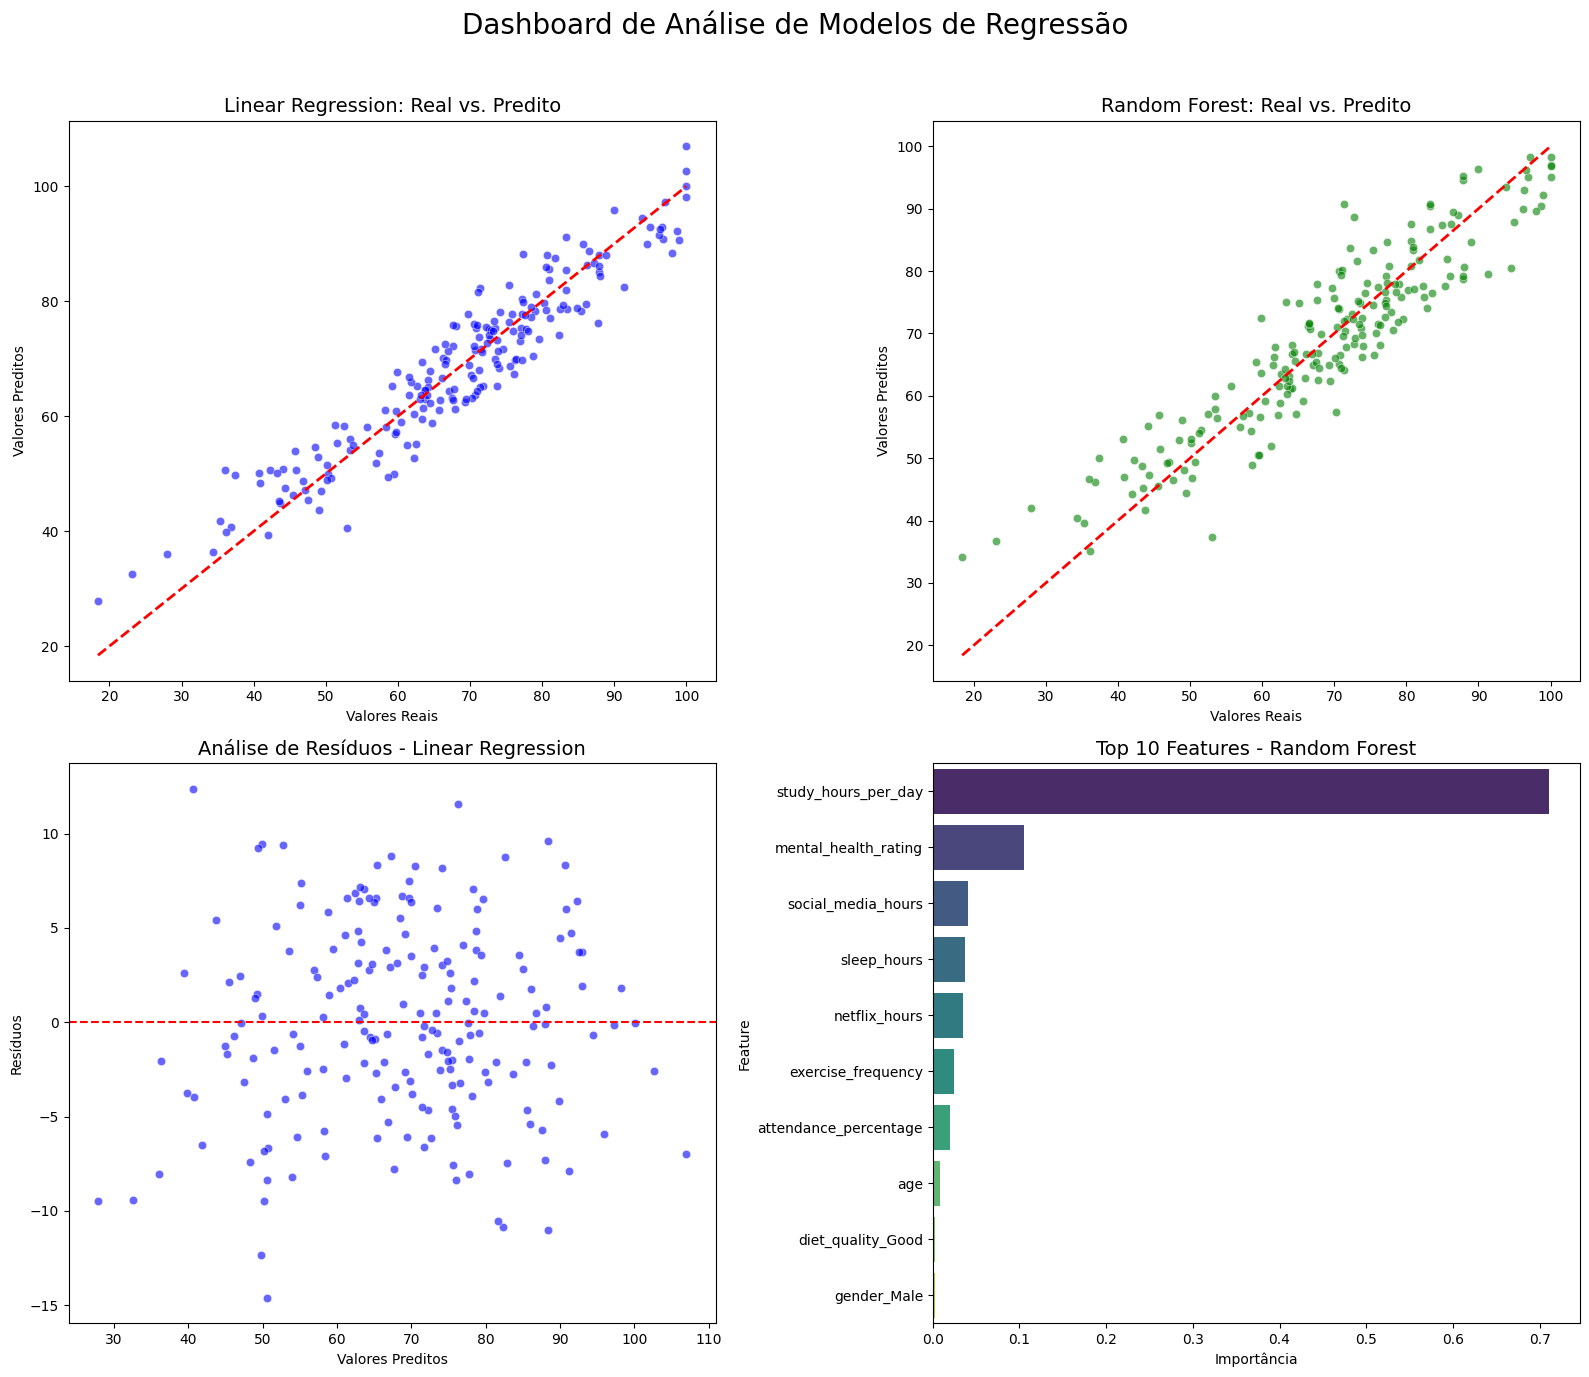

In [51]:
# Visualizações Principais

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Dashboard de Análise de Modelos de Regressão', fontsize=20)

# Real vs Predito - Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, ax=axes[0, 0], color='blue')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 0].set_title('Linear Regression: Real vs. Predito', fontsize=14)
axes[0, 0].set_xlabel('Valores Reais')
axes[0, 0].set_ylabel('Valores Preditos')

# Real vs Predito - Random Forest
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, ax=axes[0, 1], color='green')
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 1].set_title('Random Forest: Real vs. Predito', fontsize=14)
axes[0, 1].set_xlabel('Valores Reais')
axes[0, 1].set_ylabel('Valores Preditos')

# Resíduos vs Preditos (Verificar homocedasticidade)
residuals_lr = y_test - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals_lr, alpha=0.6, ax=axes[1, 0], color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Análise de Resíduos - Linear Regression', fontsize=14)
axes[1, 0].set_xlabel('Valores Preditos')
axes[1, 0].set_ylabel('Resíduos')

# Feature Importance - Random Forest
num_features_to_plot = min(10, len(X.columns))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:num_features_to_plot]
feature_names = [X.columns[i] for i in indices]

sns.barplot(x=importances[indices], y=feature_names, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title(f'Top {num_features_to_plot} Features - Random Forest', fontsize=14)
axes[1, 1].set_xlabel('Importância')
axes[1, 1].set_ylabel('Feature')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [52]:
coef = lr_model.coef_

# Regressão Linear
feature_impact_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': coef,
    'Impacto': ['Positivo' if c > 0 else 'Negativo' for c in coef]
})

feature_impact_lr['Magnitude'] = feature_impact_lr['Coeficiente'].abs()
feature_impact_lr = feature_impact_lr.sort_values(by='Magnitude', ascending=False)

print(feature_impact_lr)

                                 Feature  Coeficiente   Impacto  Magnitude
1                    study_hours_per_day    14.140996  Positivo  14.140996
7                   mental_health_rating     5.572301  Positivo   5.572301
2                     social_media_hours    -3.136892  Negativo   3.136892
6                     exercise_frequency     2.653520  Positivo   2.653520
3                          netflix_hours    -2.527933  Negativo   2.527933
5                            sleep_hours     2.426184  Positivo   2.426184
4                  attendance_percentage     1.343205  Positivo   1.343205
11                     diet_quality_Good    -0.470112  Negativo   0.470112
12                     diet_quality_Poor    -0.221033  Negativo   0.221033
14       parental_education_level_Master    -0.194240  Negativo   0.194240
9                           gender_Other     0.152676  Positivo   0.152676
10                     part_time_job_Yes     0.151868  Positivo   0.151868
13  parental_education_le

In [53]:
#  Relatório Final e Conclusão
print("\n" + "="*80)
print("RELATÓRIO FINAL - COMPARATIVO DE MODELOS")
print("="*80)

# Tabela de resultados
results = {
    'Métrica': ['R² (Teste)', 'RMSE (Erro)', 'MAE (Erro)'],
    'Linear Regression': [r2_score(y_test, y_pred_lr), np.sqrt(mean_squared_error(y_test, y_pred_lr)), mean_absolute_error(y_test, y_pred_lr)],
    'Random Forest': [r2_score(y_test, y_pred_rf), np.sqrt(mean_squared_error(y_test, y_pred_rf)), mean_absolute_error(y_test, y_pred_rf)]
}
df_results = pd.DataFrame(results).set_index('Métrica')

print(" RESUMO COMPLETO DOS RESULTADOS:")
display(df_results.round(4))

# Conclusão automatizada
print(" CONCLUSÃO E RECOMENDAÇÃO:")
print("-" * 50)

r2_diff = df_results.loc['R² (Teste)', 'Random Forest'] - df_results.loc['R² (Teste)', 'Linear Regression']

if r2_diff > 0.05:
    print("O modelo Random Forest apresentou uma performance significativamente superior.")
    print("   RECOMENDAÇÃO: Usar o Random Forest, pois ele provavelmente captura melhor as relações complexas e não-lineares nos dados.")
elif r2_diff < -0.05:
    print(" O modelo Regressão Linear apresentou uma performance significativamente superior.")
    print("   RECOMENDAÇÃO: Usar a Regressão Linear. É mais simples, mais rápido e mais fácil de interpretar.")
else:
    print(" Ambos os modelos tiveram performance similar.")
    print("   RECOMENDAÇÃO: Prefira a Regressão Linear pela sua simplicidade e interpretabilidade, a menos que a pequena vantagem do Random Forest seja crucial.")

print("PRINCIPAIS FATORES DE PREVISÃO (segundo o Random Forest):")
for i, feature in enumerate(feature_names[:5]):
    print(f"   {i+1}. {feature}")


RELATÓRIO FINAL - COMPARATIVO DE MODELOS
 RESUMO COMPLETO DOS RESULTADOS:


,Linear Regression,Random Forest
Métrica,,
R² (Teste),0.8968,0.8528
RMSE (Erro),5.1444,6.1437
MAE (Erro),4.1836,4.9098


 CONCLUSÃO E RECOMENDAÇÃO:
--------------------------------------------------
 Ambos os modelos tiveram performance **similar**.
   RECOMENDAÇÃO: Prefira a **Regressão Linear** pela sua simplicidade e interpretabilidade, a menos que a pequena vantagem do Random Forest seja crucial.
PRINCIPAIS FATORES DE PREVISÃO (segundo o Random Forest):
   1. study_hours_per_day
   2. mental_health_rating
   3. social_media_hours
   4. sleep_hours
   5. netflix_hours
